<a href="https://colab.research.google.com/github/julioaguiar07/Brazilian-E-Commerce_Olist/blob/main/Brazilian_E_Commerce_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

- Seção 1: Bases e Bibliotecas
- Seção 2: Análise Exploratória
- Seção 3: Visualizações
- Seção 4: Criação de Variáveis

# Importação das bases e bibliotecas

### Bibliotecas utilizadas

In [ ]:
!pip install summarytools

In [ ]:
!pip install catboost

In [ ]:
# Manipulação de bases de daodos
import pandas as pd

# Manipulação álgebrica
import numpy as np

# Bibliotecas de EDA
import missingno
from summarytools import dfSummary
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Datasets utilizados

In [ ]:
orders = pd.read_csv("olist_orders_dataset.csv")
orders_itemns = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")

# Análise Exploratória

### Primeiras informações

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_itemns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Junção dos datasets com colunas iguais

In [ ]:
df1 = pd.merge(orders, orders_itemns, on="order_id")

df2 = pd.merge(df1, products, on="product_id")

df3 = pd.merge(df2, customers, on="customer_id")

df4 = pd.merge(df3, reviews, on="order_id")

df5 = pd.merge(df4, payments, on="order_id")

df = pd.merge(df5, sellers, on="seller_id")

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,14840,guariba,SP


### Analisando os dados

In [ ]:
print(f"A base possui: {df.shape[0]} linhas e {df.shape[1]} colunas.")
print('')

df.info()

A base possui: 117329 linhas e 39 colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null 

In [ ]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


### Nulos nas colunas

<Axes: >

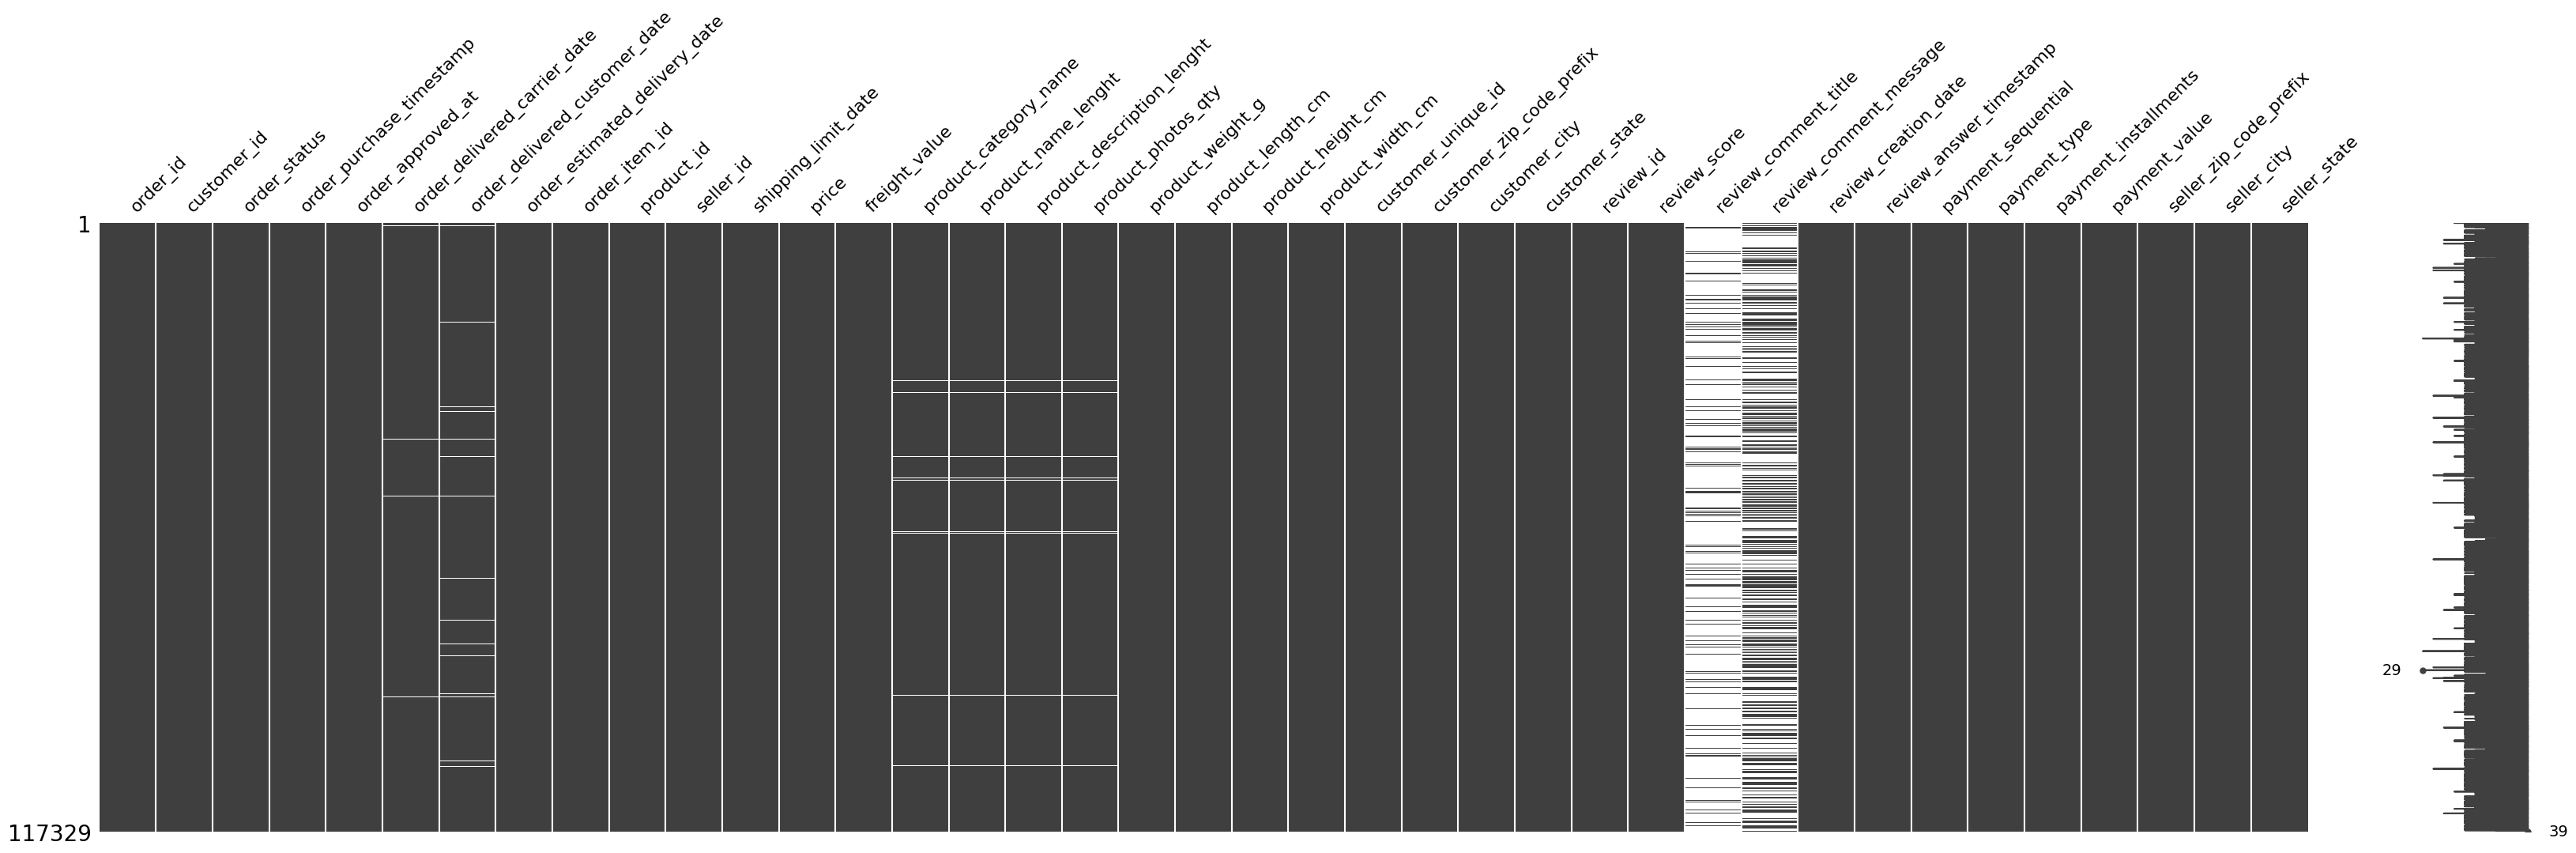

In [ ]:
# quanto mais traçoes brancos, mais valores nulos.
missingno.matrix(df, figsize=(40,10))

In [ ]:
rows, columns = df.shape

percentual_nan = ((df.isnull().sum() / rows)*100).round(2)
percentual_data_frame = pd.DataFrame({"Nome da Coluna":percentual_nan.index, "Porcentagem de valores nulos":percentual_nan.values})
percentual_data_frame

,Nome da Coluna,Quantidade de valores nulos
0,order_id,0.00
1,customer_id,0.00
2,order_status,0.00
3,order_purchase_timestamp,0.00
4,order_approved_at,0.01
5,order_delivered_carrier_date,1.05
6,order_delivered_customer_date,2.11
7,order_estimated_delivery_date,0.00
8,order_item_id,0.00
9,product_id,0.00


### Análise de valores duplicados

In [ ]:
df[df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state


### Valores e distintos

In [ ]:
contagem = pd.DataFrame(columns = ["Variável", 'Quantidade_valores_distintos'])

for colunas in df.columns:
  dados = pd.DataFrame({'Variável': [colunas], 'Quantidade_valores_distintos' :df[colunas].value_counts().shape[0]})
  contagem = pd.concat([contagem, dados], ignore_index=True)

contagem

,Variável,Quantidade_valores_distintos
0,order_id,97916
1,customer_id,97916
2,order_status,7
3,order_purchase_timestamp,97370
4,order_approved_at,89533
5,order_delivered_carrier_date,80449
6,order_delivered_customer_date,95021
7,order_estimated_delivery_date,449
8,order_item_id,21
9,product_id,32789


### *Atalho para ver todos os dados:

In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 895ab968e7bb0d5659d16cd74cd1652. fedcd9f7ccdc8cba3a18defedd1a553. fa65dad1b0e818e3ccc5cb0e3923134. ccf804e764ed5650cd8759557269dc5. 465c2e1bee4561cb39e0db8c5993aa6. 6d58638e32674bebee793a47ac4cba7. c6492b842ac190db807c15aff21a7d8. a3725dfe487d359b5be08cac48b64e9. 68986e4324f6a21481df4e6e89abcf10. 285c2e15bebd4ac83635ccc563dc7111. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
2,customer_id[object],1. 270c23a11d024a44c896d1894b261a2. 13aa59158da63ba0e93ec6ac2c07aa3. 9af2372a1e49340278e7c1ef8d749f4. 92cd3ec6e2d643d4ebd0e3d6238f695. 63b964e79dee32a3587651701a2b8d6. 2ba91e12e5e4c9f56b82b86d9031d37. 6ee2f17e3b6c33d6a9557f280edd298. d22f25a9fadfb1abbc2e29395b12399. 86cc80fef09f7f39df4b0dbce48e8110. b246eeed30b362c09d867b9e598bee11. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAy5JREFUeJzt3MGN02AURtHnKIJhY2tkKSVADymCLb3ThTcwrMKCHq4lc04F/+JKT5H8ZXm9XgOF29kP4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MrdlWb4ty/J29kO4vtvMfJ2Zz2c/hOtzRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG1mfs7Mn7MfwvUt/sWIijNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERGxnrKjLWVWScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZKyryDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyziiZZWa+zMynsx/C9d33ff++ruv72Q/h+u7rur4/n8/f27Z9nP0Yrus4jrf7zMy2bR+Px+PX2Q/i2vxAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3Of+ff5x9kP4dqO43hb9n3/4eNJCj4LJ2NdRcYPBDJiIyM2MmIjIzYyYiMjNjJiIyM2Mn8BY+dLgsx6ZCoAAAAASUVORK5CYII="">",0(0.0%)
3,order_status[object],1. delivered2. shipped3. canceled4. invoiced5. processing6. unavailable7. approved,"114,859 (97.9%)1,167 (1.0%)553 (0.5%)370 (0.3%)370 (0.3%)7 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8v

In [ ]:
tipos_pagamento = df["payment_type"].value_counts().reset_index()
tipos_pagamento.columns=["Tipo","Contagem"]
tipos_pagamento

,Tipo,Contagem
0,credit_card,86520
1,boleto,22835
2,voucher,6282
3,debit_card,1692


# Visualizações

### Histograma (tipo de pagamento)

In [ ]:
fig = px.bar(tipos_pagamento, x="Tipo", y="Contagem", color='Tipo', text='Contagem',
             title="Pedidos por tipo de pagamento", labels={'Contagem':'Quantidade de Pedidos', 'Tipo':'Tipo de Pagamento'})

fig.update_traces(textposition='outside', texttemplate='%{text}',
                  textfont_size=12)
fig.show()

### Correlação

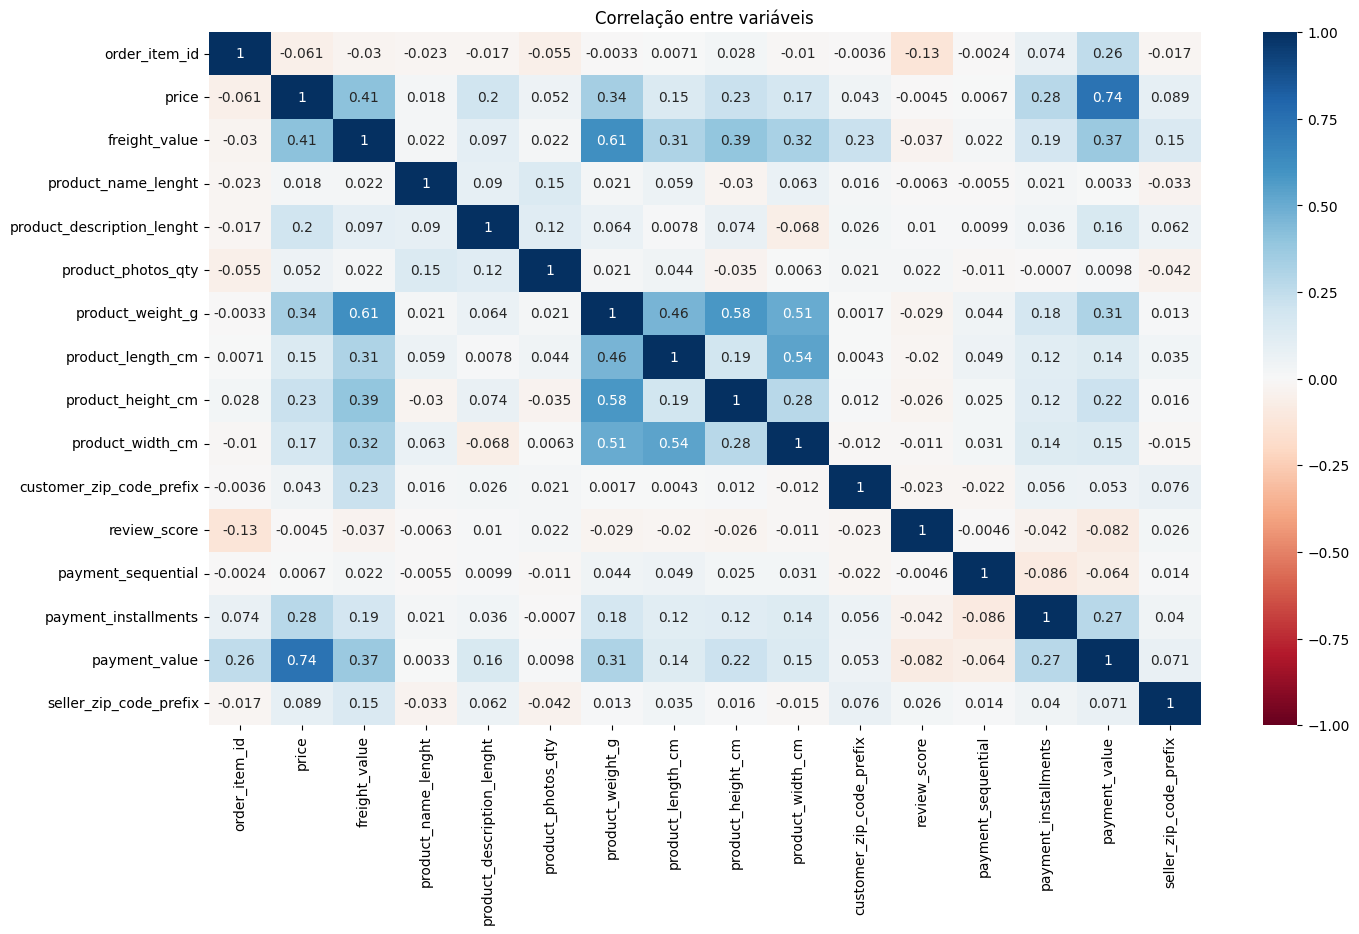

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Correlação entre variáveis')

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

### Regressão

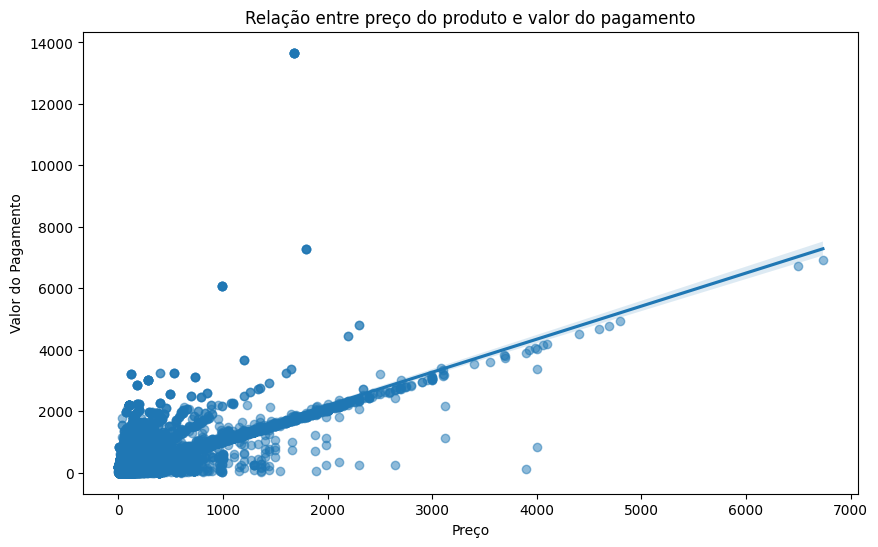

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='payment_value', data=df, scatter_kws={'alpha':0.5})

plt.title('Relação entre preço do produto e valor do pagamento')
plt.xlabel("Preço")
plt.ylabel('Valor do Pagamento')
plt.show()

### Boxplot

([0], [Text(0, 0, '')])

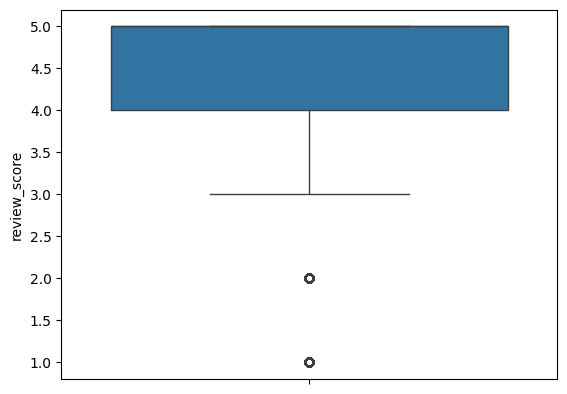

In [ ]:
fig = sns.boxplot(y='review_score', data=df)
plt.xticks(rotation=90)

In [ ]:
df['review_score'].describe()

,review_score
count,117329.000000
mean,4.031467
std,1.387927
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Notas de review

<ipython-input-70-6576abedceee>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




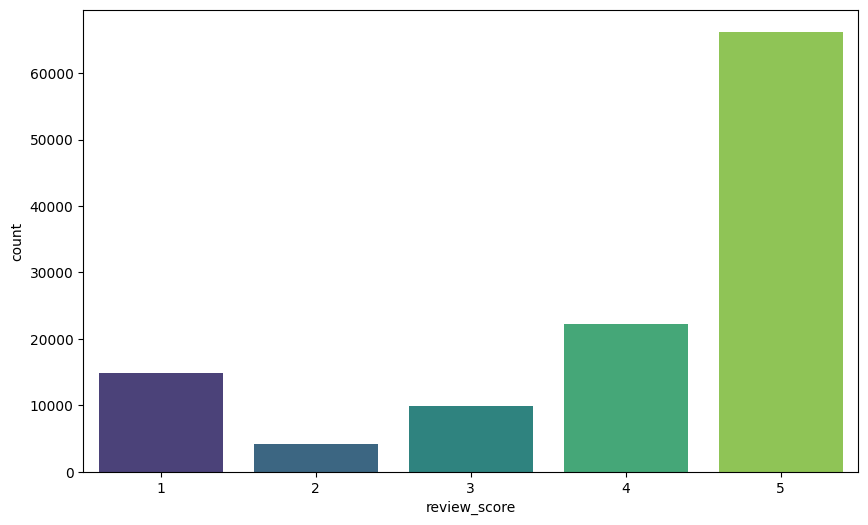

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='review_score', data=df, palette='viridis')
plt.show()

### Distribuição dos Preços

([0], [Text(0, 0, '')])

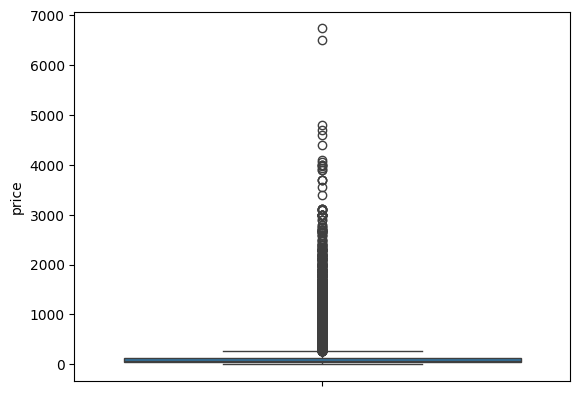

In [ ]:
fig = sns.boxplot(data=df, y='price')
plt.xticks(rotation=90)

In [ ]:
df['price'].describe()

,price
count,117329.000000
mean,120.524349
std,182.944843
min,0.850000
25%,39.900000
50%,74.900000
75%,134.900000
max,6735.000000


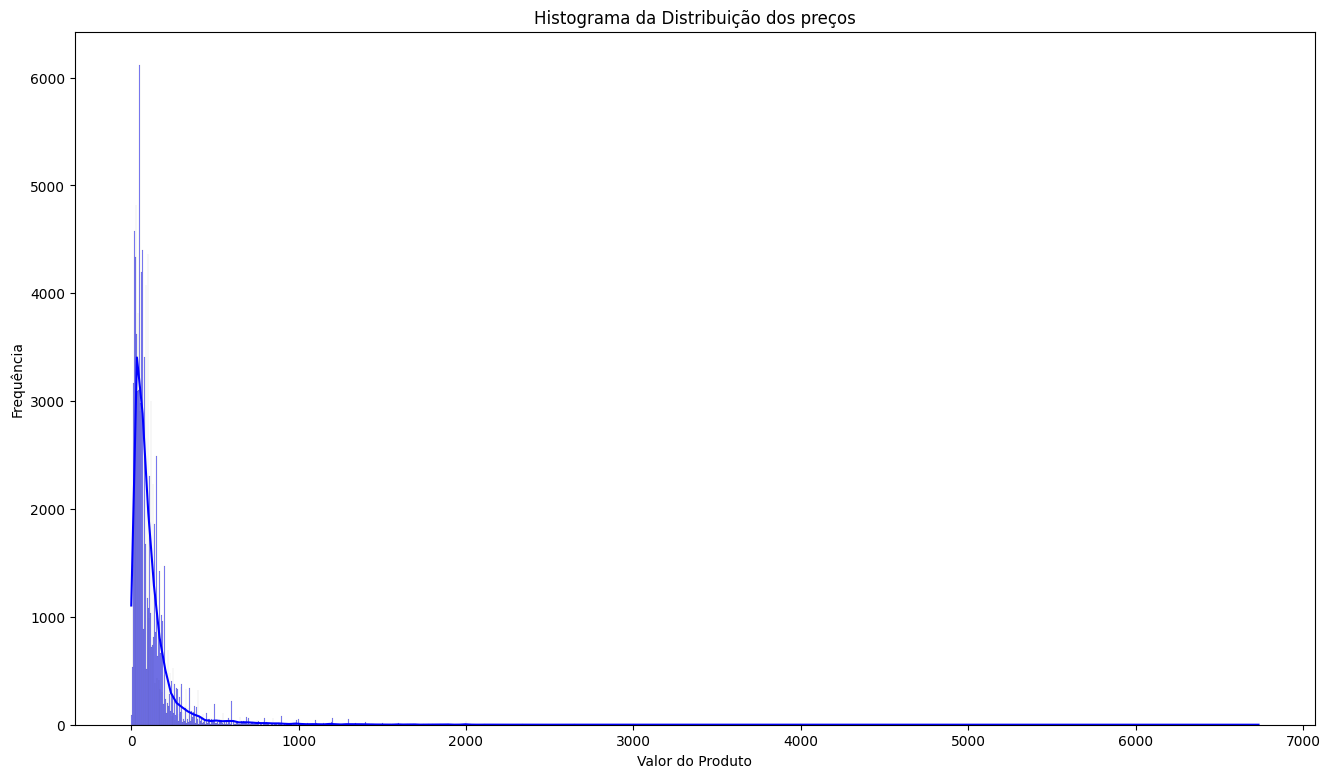

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x='price', data=df, color='blue', kde=True)
plt.title('Histograma da Distribuição dos preços')
plt.xlabel('Valor do Produto')
plt.ylabel('Frequência')
plt.show()

### Distribuição dos valores de frete

([0], [Text(0, 0, '')])

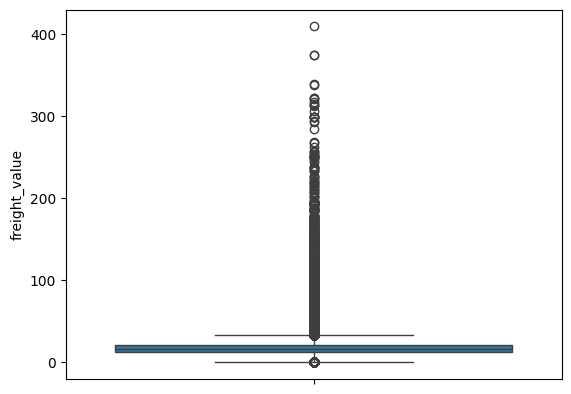

In [ ]:
fig = sns.boxplot(data=df, y='freight_value')
plt.xticks(rotation=90)

In [ ]:
df['freight_value'].describe()

,freight_value
count,117329.000000
mean,20.027514
std,15.828077
min,0.000000
25%,13.080000
50%,16.280000
75%,21.180000
max,409.680000


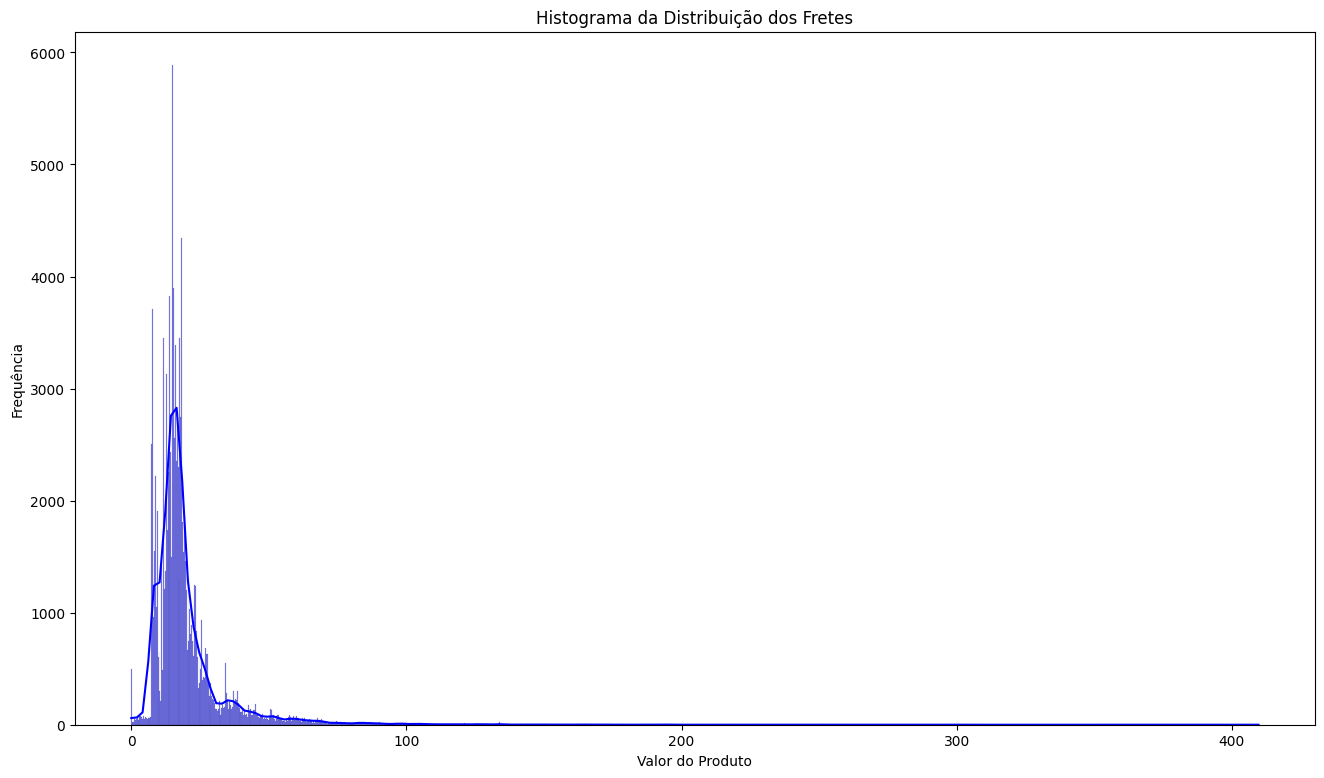

In [ ]:
plt.figure(figsize=(16,9))
sns.histplot(x='freight_value', data=df, color='blue', kde=True)
plt.title('Histograma da Distribuição dos Fretes')
plt.xlabel('Valor do Produto')
plt.ylabel('Frequência')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'delivered'),
  Text(1, 0, 'invoiced'),
  Text(2, 0, 'shipped'),
  Text(3, 0, 'processing'),
  Text(4, 0, 'canceled'),
  Text(5, 0, 'unavailable'),
  Text(6, 0, 'approved')])

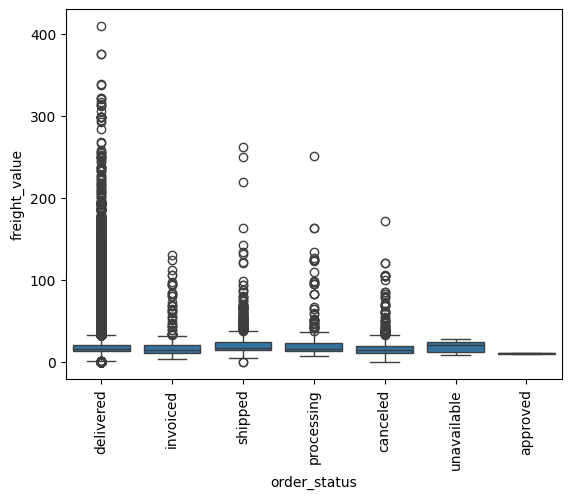

In [ ]:
fig = sns.boxplot(data=df, x='order_status', y='freight_value')
plt.xticks(rotation=90)

# Novas variáveis

### Volume


In [ ]:
df['Volume'] = df['product_height_cm']*df['product_width_cm']*df['product_length_cm']

### Densidade

In [ ]:
df['Densidade'] = df['product_weight_g'] / df['Volume']

### Tempo de Entrega Real

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])


df['Entrega_Real'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


### Tempo de Entrega Estimada

In [ ]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df['Entrega_Estimada'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
